In [96]:
import numpy as np
import random
import tensorflow as tf

In [98]:
mnist = tf.keras.datasets.mnist
#iris = tf.keras.datasets.

In [99]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [100]:
import matplotlib.pylab as plt

In [101]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data() #데이터를 불러 와서 넣음

In [102]:
X_train0 #이미지 데이터 -> 2차원 배열로 만들어놓고 -> 다시 1차원 배열로 만들어 인식시킨다.


#이미지는 원래 2차원 배열로 구성되어 있다.
#근데, 학습시킬때는 이 2차원 배열을 전부 1차원으로 만들어서 원핫인코딩(0,1)로서 만듦
#1은 색상이 있는 것인데, 이걸로 색상의 타입을 구분한다.
#

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [103]:
y_train0 #그래서~~~ 마지막줄은 8, 마지막줄 전은 6으로 표현해주고 있음

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

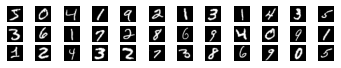

In [104]:
plt.figure(figsize=(6,1))
for i in range(36):
   plt.subplot(3,12, i+1)
   plt.imshow(X_train0[i], cmap='gray') #colormap = gray
   plt.axis('off')
plt.show()

#트레인 데이터 안에 들어가 있는 애들임

In [105]:
#2차원 데이터를 1차원으로 만들어 넣어주는 함수가 있음 / 이미지는 2차원되어 있는걸 1차원으로 읽겠금 해서 컴퓨터가 읽음

In [106]:
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0 #일렬로 쭉 만들어줌
#28x28 짜리 = 784로 만듦

In [107]:
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0 #일렬로 쭉 만들어줌

In [108]:
y_train0[:5]  

array([5, 0, 4, 1, 9], dtype=uint8)

In [109]:
#범주형으로 되어있는건 크고 작다고 생각함. 
#하여 -> 원핫인코딩으로 바꿔줘서 넣어야 데이터를 파단함

In [110]:
#범주형은 one-hot 인코딩으로 각 카테고리별 항목을 만들어, 해당하는 항목에 표시하는 형식으로 0,1로 구분하여줌.
#1은 해당항목에 속한다는 뜻이고, 
#0은 해당항목에 속하지 않는다는 뜻이다.
#원핫인코딩 : keras(to_categorical()) 

In [111]:
from tensorflow.keras.utils import to_categorical

In [112]:
y_train0

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [113]:
Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[0:5] #원핫인코딩임

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [114]:
#원핫인코딩 = to_categorical / 데이터를 1차원으로 쭉 만들어줘야하고, 카테고리는 더미파일로 만들어줘야함(원핫인코딩)

In [115]:
from tensorflow.keras.models import Sequential
#DeepLearning의 레이어를 쌓을 수 있는 틀 역할

In [116]:
from tensorflow.keras.layers import Dense
#각 레이어에 해당하는 객체

In [117]:
#옵티마이저 필요 : 학습률 조절
from tensorflow.keras.optimizers import SGD #경사하강법 종류 하나 임포트

In [118]:
tf.random.set_seed(0)

In [119]:
#신경망 구축 시작
#1. 특열할 객체를 생성해라
#2. layer를 쌓아라
#3. model compile // 모델컴파일

model = Sequential() 

In [120]:
#입력층

model.add(Dense(15, input_dim=784, activation='sigmoid')) #Chain식으로 구축함, input은 퍼셉트론인데 현재 글자를 2차원 -> 1차원 배열로 바꿔놓음, 그게 784개임
#이미지는 시그모이드 함수를 이용

#DENSE 는 INPUT 에서 뻗어나가는 가지수
#INPUT_DIM 은 입력층에서 입력하는 노드의 개수

In [121]:
#SIGMOID 함수는 0과 1 로 나누어진 것중, 가까운곳에 위치한걸 정답으로 예측함
#로지스틱(시그모이드) -> 어떤 값이 들어왔을때 0.5 이상이면 1로 판단 / 0.5 이하면 0으로 판단해서 -> 결과값을 예측함
#부가 : 계단함수는 0과 1로만 딱 나누어짐 / 

In [122]:
#출력층

model.add(Dense(10, activation='sigmoid'))

In [123]:
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy']) #SGD 방식을 이용하여, 최적화 기울기를 찾아라. 
#loss 움직일때, 면적으로 움직여라. 움직이는 면적을 점점 줄여라
#1번 그래프, 2번 그래프간의 간격 거리를 줄이며 최적화 시킬때는 mean_square(네모')로 점점 줄이면서 최적화 기울기를 찾으시오.
#accuracy가 점점 떨어진다면, 나는 문제있다고 보여주어라

In [124]:
%%time
hist = model.fit(X_train, Y_train,
                epochs=20, batch_size=100,
                 validation_data=(X_test, Y_test), 
                 verbose=2
                )
#양이 많으니깐, batch로 100개씩 묶어서 해라
#(한 번의 epoch는 인공 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태) 
#batch size는 한 번의 batch마다 주는 데이터 샘플의 size. 여기서 batch(보통 mini-batch라고 표현)는 나눠진 데이터 셋을 뜻하며 iteration는 epoch를 나누어서 실행하는 횟수라고 생각하면 됨.

Epoch 1/20
600/600 - 1s - loss: 0.0990 - accuracy: 0.2698 - val_loss: 0.0878 - val_accuracy: 0.3831
Epoch 2/20
600/600 - 1s - loss: 0.0867 - accuracy: 0.4191 - val_loss: 0.0853 - val_accuracy: 0.4480
Epoch 3/20
600/600 - 1s - loss: 0.0835 - accuracy: 0.4619 - val_loss: 0.0811 - val_accuracy: 0.4739
Epoch 4/20
600/600 - 1s - loss: 0.0788 - accuracy: 0.4920 - val_loss: 0.0760 - val_accuracy: 0.5149
Epoch 5/20
600/600 - 1s - loss: 0.0736 - accuracy: 0.5373 - val_loss: 0.0708 - val_accuracy: 0.5545
Epoch 6/20
600/600 - 1s - loss: 0.0684 - accuracy: 0.5762 - val_loss: 0.0657 - val_accuracy: 0.5993
Epoch 7/20
600/600 - 1s - loss: 0.0637 - accuracy: 0.6111 - val_loss: 0.0612 - val_accuracy: 0.6260
Epoch 8/20
600/600 - 1s - loss: 0.0595 - accuracy: 0.6354 - val_loss: 0.0573 - val_accuracy: 0.6467
Epoch 9/20
600/600 - 1s - loss: 0.0559 - accuracy: 0.6579 - val_loss: 0.0539 - val_accuracy: 0.6714
Epoch 10/20
600/600 - 1s - loss: 0.0528 - accuracy: 0.6830 - val_loss: 0.0510 - val_accuracy: 0.6989

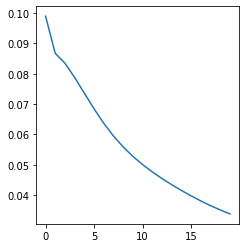

In [125]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.show()

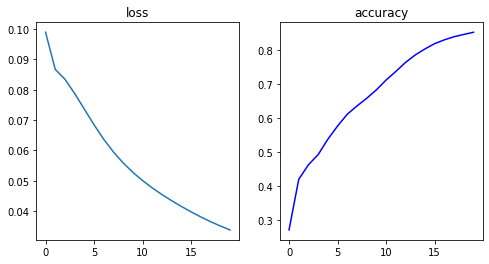

In [126]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], '-b', label='training')
plt.title('accuracy')
plt.show()

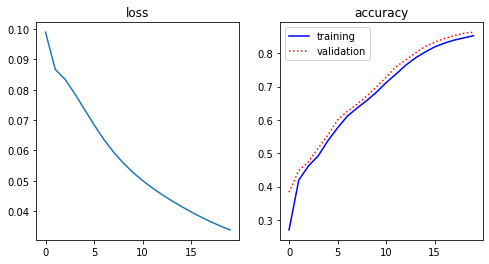

In [127]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #이 행에 끼겠다
plt.plot(hist.history['loss'])
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], '-b', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

#그래프가 점점 최적화로 되면서, 손실율을 줄이는거다(마진이 줄어드니깐 그래프가 최적화된 선을 찾아가잖아)
#accuracy는 정답률을 점점 맞추고 있다.

In [128]:
hist.history

{'accuracy': [0.2697666585445404,
  0.41913333535194397,
  0.461899995803833,
  0.49195000529289246,
  0.5373166799545288,
  0.576200008392334,
  0.6110666394233704,
  0.6354333162307739,
  0.6579166650772095,
  0.6829833388328552,
  0.7119666934013367,
  0.7371000051498413,
  0.7638000249862671,
  0.7858499884605408,
  0.8034833073616028,
  0.8192166686058044,
  0.8303333520889282,
  0.8395833373069763,
  0.8461833596229553,
  0.8527666926383972],
 'loss': [0.09895489364862442,
  0.08670753240585327,
  0.0834687277674675,
  0.07875487208366394,
  0.07358437031507492,
  0.06843540072441101,
  0.0636521503329277,
  0.059467997401952744,
  0.055873971432447433,
  0.05276728793978691,
  0.05005067586898804,
  0.047634340822696686,
  0.045445285737514496,
  0.043421827256679535,
  0.04152717441320419,
  0.039744675159454346,
  0.038075439631938934,
  0.036527544260025024,
  0.03510487079620361,
  0.03380851820111275],
 'val_accuracy': [0.3831000030040741,
  0.4480000138282776,
  0.47389999

In [129]:
#모델을 사용하여예측해봄

model.predict(X_test[:1, :])

#0번부터 9번까지 될 확률을 뽑아준것임
#이미지가 0~9번까지 지금 분류되어있잖아. 

array([[0.07847008, 0.0175702 , 0.0304372 , 0.09370029, 0.03188553,
        0.07221228, 0.0011594 , 0.81734556, 0.05743411, 0.19194372]],
      dtype=float32)

In [130]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [131]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7])

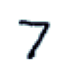

In [132]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[0], cmap=plt.cm.bone_r) #이 행에 끼겠다
plt.grid(False)
plt.axis("off")
plt.show()

In [133]:
model.predict(X_test[1:2, :])

#0~9 까지 각각의 가능성 퍼센티지를 찾아주는 것임

array([[0.16747737, 0.05332464, 0.37588322, 0.08386496, 0.01498869,
        0.06657639, 0.31780887, 0.00518978, 0.06138788, 0.0206296 ]],
      dtype=float32)

In [134]:
model.predict_classes(X_test[1:2, :], verbose=0)

#Array[6] 에 있는 0.19의 정확도가 제일 높기때문에 -> array[6] 으로 표시한것이고, 그리고 그거의 이미지는 2이다.

array([2])

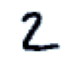

In [135]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[1], cmap=plt.cm.bone_r) #이 행에 끼겠다
plt.grid(False)
plt.axis("off")
plt.show()

In [143]:
evaluation = model.evaluate(X_test, Y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.8632
loss:  0.03260873258113861
accuracy 0.8632000088691711


In [144]:
model.save('my_model.hdf5')
del model

In [145]:
from tensorflow.keras.models import load_model

model2 = load_model('my_model.hdf5')
print(model2.predict_classes(X_test[:1, :], verbose=0))

#print는 해당 내용 출력!

[7]
